# Ejercicios Prácticos

![](https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png)

Más información en: https://pycaret.org y https://www.kaggle.com/frtgnn/pycaret-introduction-classification-regression


# Instalación de Pycaret

In [3]:
import numpy as np 
import pandas as pd 


In [1]:
!pip install pycaret

     |████████████████████████████████| 188 kB 4.9 MB/s 
     |████████████████████████████████| 259 kB 58.1 MB/s 
     |████████████████████████████████| 60 kB 4.7 MB/s 
     |████████████████████████████████| 63.9 MB 50.2 MB/s 
     |████████████████████████████████| 92 kB 201 kB/s 
     |████████████████████████████████| 7.0 MB 14.7 MB/s 
     |████████████████████████████████| 378 kB 54.4 MB/s 
     |████████████████████████████████| 127 kB 61.0 MB/s 
     |████████████████████████████████| 3.0 MB 47.7 MB/s 
     |████████████████████████████████| 81 kB 6.9 MB/s 
     |████████████████████████████████| 7.3 MB 15.1 MB/s 
     |████████████████████████████████| 142.8 MB 37 kB/s 
     |████████████████████████████████| 234 kB 43.0 MB/s 
     |████████████████████████████████| 2.1 MB 26.9 MB/s 
     |████████████████████████████████| 46 kB 3.2 MB/s 
     |████████████████████████████████| 6.1 MB 48.3 MB/s 
     |████████████████████████████████| 64 kB 2.3 MB/s 
  Created wheel for shap

# Regresión: Estimación del valor de la vivienda

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSYeyNpaoAW-3rFX9-ORmiJ-uLAAswYBRhszs2QzllV7MCfFPvk&usqp=CAU)

# Importa todo el paquete de regresión

In [1]:
from pycaret.regression import *

# Analisis de los datos

In [5]:
train = pd.read_csv('data/train.csv')
test  = pd.read_csv('data/test.csv')
sample= pd.read_csv('data/sample_submission.csv')

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Set up del entorno (pre-procesamiento)

In [8]:
reg = setup(data = train, 
             target = 'SalePrice',
             numeric_imputation = 'mean',
             categorical_features = ['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType',
                                     'Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',   
                                     'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',    
                                     'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',   
                                     'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',   
                                     'Electrical','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                                     'SaleCondition']  , 
             ignore_features = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],
             normalize = True,
             silent = True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,6648
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1460, 81)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,58
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# Entrenamiento y comparación de diferentes modelos

In [9]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,15707.5192,741986646.8328,26379.9222,0.8593,0.1321,0.0931,15.0067
1,Light Gradient Boosting Machine,17503.1127,876655197.6830,29067.1929,0.8377,0.1464,0.1032,0.2073
2,Gradient Boosting Regressor,17432.0082,872889947.1748,28532.1384,0.8365,0.1445,0.1037,0.6998
3,Extreme Gradient Boosting,17640.5914,919224383.1480,29094.5710,0.8309,0.1453,0.1041,0.3901
4,Random Forest,18227.0395,965964298.9402,30488.2800,0.8159,0.1556,0.1097,0.5846
5,Huber Regressor,15917.6829,1011983247.6353,29222.0724,0.7838,0.1362,0.0949,0.4019
6,Lasso Least Angle Regression,16523.7347,1031083772.4232,29456.0477,0.7786,0.1452,0.0997,0.0483
7,Passive Aggressive Regressor,16260.5112,1062268151.3124,30044.4253,0.7744,0.1382,0.0970,0.9983
8,Bayesian Ridge,18146.5448,1128947789.4032,31602.0207,0.7660,0.1560,0.1098,0.1977
9,Ridge Regression,18554.6764,1194472146.4115,32200.5414,0.7477,0.1676,0.1122,0.0161


# Entrenamiento de CatBoost

In [10]:
cb = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16372.4610,549184894.3008,23434.6942,0.9060,0.1126,0.0844
1,14498.6354,559902471.9108,23662.2584,0.9059,0.1288,0.0895
2,18238.6143,1627797963.8438,40345.9783,0.5571,0.1682,0.1093
3,18246.9092,918577974.7813,30308.0513,0.8767,0.1382,0.0998
4,14549.1097,667107153.0880,25828.4175,0.8298,0.1357,0.0891
5,17617.5781,555623586.7237,23571.6692,0.8881,0.1442,0.1078
6,13348.4799,292320842.4211,17097.3929,0.9539,0.1199,0.0856
7,13050.4222,359935717.8449,18971.9719,0.9259,0.1074,0.0832
8,17137.6690,1260999579.5804,35510.5559,0.8428,0.1643,0.1129
9,14015.3131,628416283.8333,25068.2326,0.9069,0.1015,0.0693


# Optimización del modelo

In [13]:
tuned_cb = tune_model(cb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16008.9985,531217843.0944,23048.1636,0.9091,0.1192,0.0859
1,15290.7914,617552227.9958,24850.5981,0.8962,0.1412,0.0984
2,17450.2091,1247558159.7858,35320.7893,0.6606,0.1671,0.1081
3,18481.2611,836995027.9210,28930.8664,0.8877,0.1387,0.1048
4,15953.2895,855535783.9231,29249.5433,0.7817,0.1510,0.0979
5,17968.2805,618499782.3619,24869.6559,0.8754,0.1435,0.1065
6,14624.5942,388284254.3559,19704.9297,0.9387,0.1297,0.0925
7,15349.9142,437364546.1454,20913.2624,0.9100,0.1132,0.0955
8,17273.6824,1108648548.3180,33296.3744,0.8618,0.1519,0.1078
9,15901.8913,763344395.5122,27628.6879,0.8869,0.1086,0.0779


# Interpretación del modelo

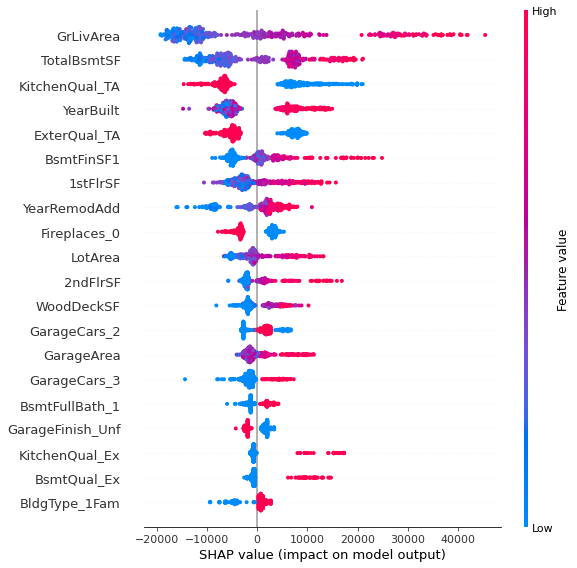

In [14]:
interpret_model(tuned_cb)

In [15]:
predictions = predict_model(tuned_cb, data = test)


,Id,SalePrice
0,1461,132558.2324
1,1462,171422.3023
2,1463,191077.7702
3,1464,190203.2746
4,1465,197690.5615
